Тема проекта: **Прогнозирование диабета**

Выполнили: **Ходацкий Богдан, Кавторин Даниил**

Преподаватель: **Шпаковская Ирина Игоревна**

## План проекта:
1) Цель и задачи исследования.
2) Описание набора данных.
3) Разведочный анализ данных.
4) Создание модели.
5) Выводы.

## 1. Цель и задачи исследования:

- Диабет - это хроническое заболевание, при котором уровень сахара в крови (глюкозы) в организме слишком высокий. Глюкоза является основным источником энергии для клеток организма. Она поступает в клетки с пищей и перерабатывается с помощью инсулина, гормона, вырабатываемого поджелудочной железой.
    
    При диабете поджелудочная железа не вырабатывает достаточно инсулина или организм не способен эффективно использовать инсулин. В результате уровень сахара в крови остается высоким.

    Диабет может привести к серьезным осложнениям, включая сердечные заболевания, инсульт, слепоту, почечную недостаточность и неврологические нарушения.

- В этом проекте мы будем использовать набор данных с информацией о пациентах для создания модели машинного обучения, цель состоит в том, чтобы на основе диагностических измерений предсказать, есть ли у пациента сахарный диабет. Это может помочь увидеть риски развития заболевания у разных людей, раньше выявлять диабет, что, возможно, способно предотвратить развитие тяжелых осложнений.

## 2. Описание набора данных:
Источник данных (Kaggle): [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

Данные представлены в виде табличного .csv файла, в котором содержатся сведения из Национального института диабета, заболеваний органов пищеварения и почек. Для отбора данных в представленном наборе из более обширной базы данных была выбрана определенная группа людей. В частности, все пациенты здесь - женщины в возрасте не менее 21 года, происходящие из индийского племени Пима.

Описание показателей, хранящихся в таблице:
1. **(Pregnancies) Беременности:** количество беременностей
2. **(Glucose) Глюкоза:** концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе (ммоль/л)
3. **(BloodPressure) Артериальное давление:** диастолическое артериальное давление (мм рт.ст.)
4. **(SkinThickness) Толщина кожи:** толщина кожной складки на трицепсе (мм)
5. **(Insulin) Инсулин:** 2-часовой сывороточный инсулин (мкме/мл)
6. **(BMI) ИМТ:** индекс массы тела (вес в кг/(рост в м)^2)
7. **(DiabetesPedigreeFunction) Функция предрасположенности к диабету:** функция, оценивающая риск развития диабета на основе родословной
8. **(Age) Возраст:** возраст (лет)
9. **(Outcome) Результат:** наличие/отсутствие диагнострированного диабета (0/1)

## 3. Разведочный анализ данных (EDA):

### Добавление библиотек:

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')

### Импорт данных:

In [2]:
df = pd.read_csv('../input/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Проверка данных на дубликаты, отсутствующие и нулевые значения:

Проверим наличие дубликатов данных:

In [4]:
df.duplicated().sum()

0

Дубликатов нет, проверим на отсутствующие значения:

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Пустых ячеек нет, проверим на нули:

In [6]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Заменим нулевые значения на медианные:

In [7]:
df['Glucose'] = df['Glucose'].replace(0, np.median(df['Glucose']))
df['BloodPressure'] = df['BloodPressure'].replace(0, np.median(df['BloodPressure']))
df['SkinThickness'] = df['SkinThickness'].replace(0, np.median(df['SkinThickness']))
df['Insulin'] = df['Insulin'].replace(0, np.median(df['Insulin']))
df['BMI'] = df['BMI'].replace(0, np.median(df['BMI']))
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Пропущенных значений больше нет.

### Визуализация данных:

### Распределение по показателям:

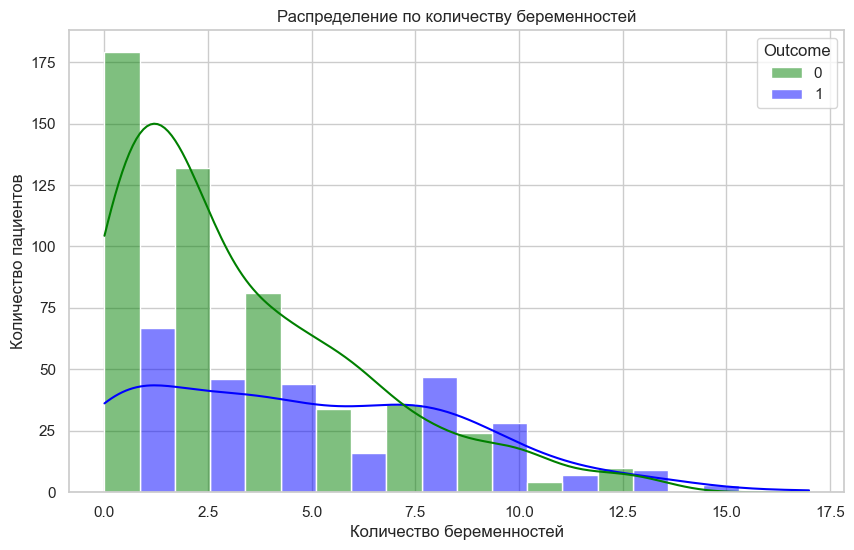

In [8]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, 
                  x='Pregnancies', 
                  hue='Outcome', 
                  multiple='dodge', 
                  bins=10, 
                  kde=True, 
                  palette=['green', 'blue'])

ax.set(title='Распределение по количеству беременностей',
       xlabel='Количество беременностей',
       ylabel='Количество пациентов')

plt.show()

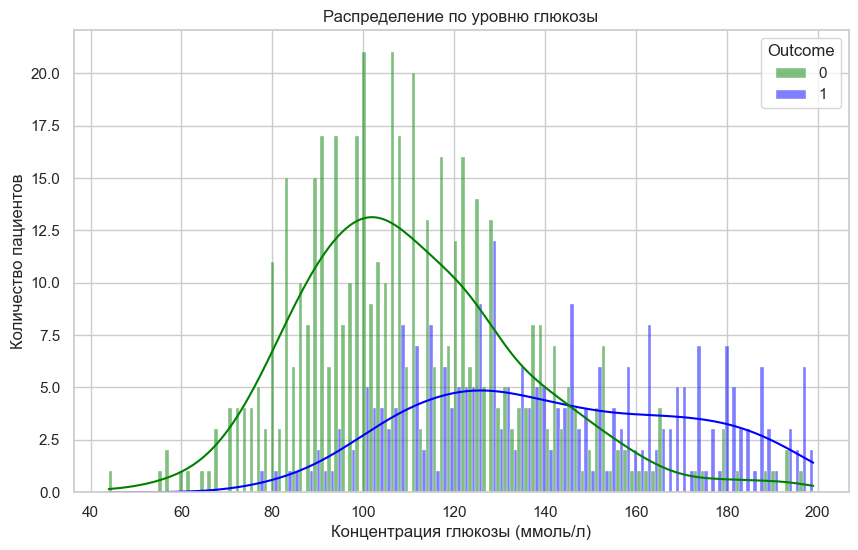

In [9]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, 
                  x='Glucose', 
                  hue='Outcome', 
                  multiple='dodge', 
                  bins=100, 
                  kde=True, 
                  palette=['green', 'blue'])

ax.set(title='Распределение по уровню глюкозы',
       xlabel='Концентрация глюкозы (ммоль/л)',
       ylabel='Количество пациентов')

plt.show()

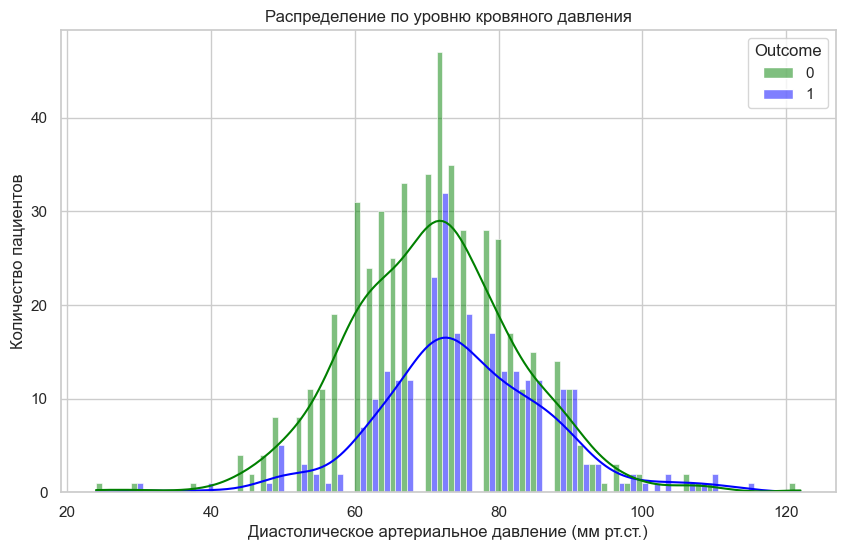

In [10]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, 
                  x='BloodPressure', 
                  hue='Outcome', 
                  multiple='dodge', 
                  bins=60, 
                  kde=True, 
                  palette=['green', 'blue'])

ax.set(title='Распределение по уровню кровяного давления',
       xlabel='Диастолическое артериальное давление (мм рт.ст.)',
       ylabel='Количество пациентов')

plt.show()

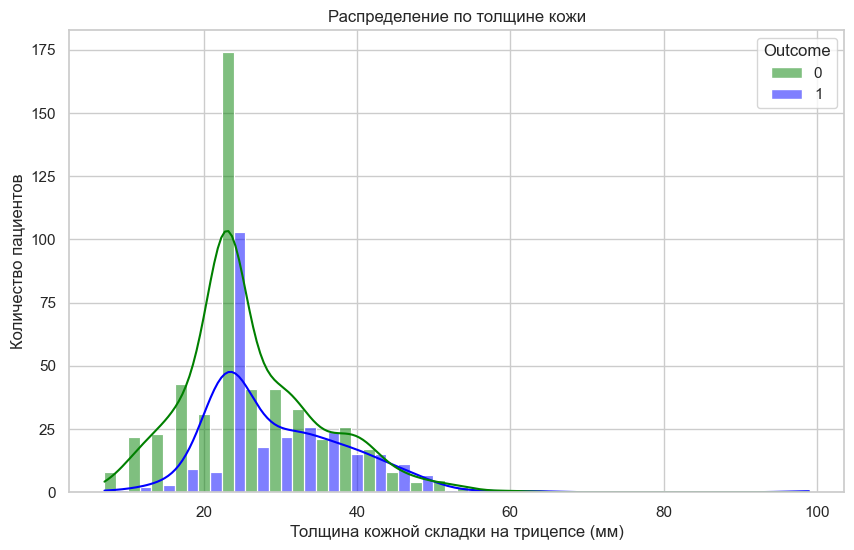

In [11]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, 
                  x='SkinThickness', 
                  hue='Outcome', 
                  multiple='dodge', 
                  bins=30, 
                  kde=True, 
                  palette=['green', 'blue'])

ax.set(title='Распределение по толщине кожи',
       xlabel='Толщина кожной складки на трицепсе (мм)',
       ylabel='Количество пациентов')

plt.show()

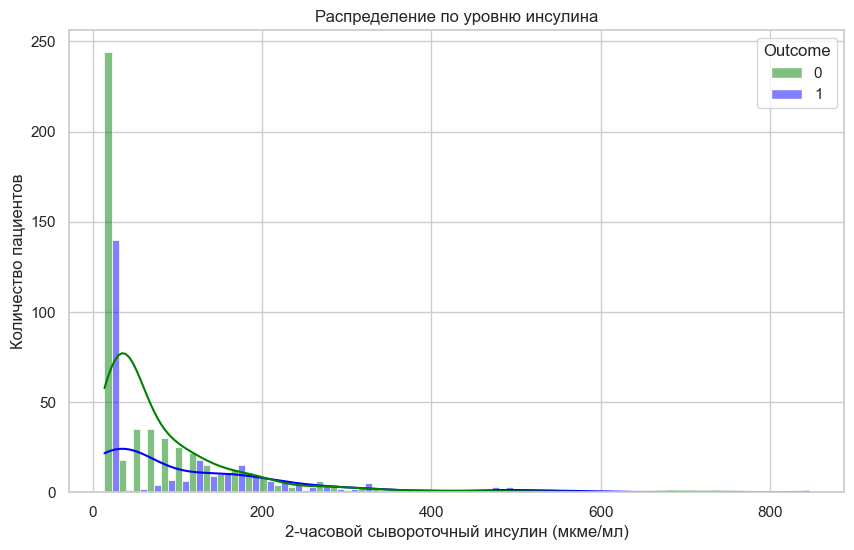

In [12]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, 
                  x='Insulin', 
                  hue='Outcome', 
                  multiple='dodge', 
                  bins=50, 
                  kde=True, 
                  palette=['green', 'blue'])

ax.set(title='Распределение по уровню инсулина',
       xlabel='2-часовой сывороточный инсулин (мкме/мл)',
       ylabel='Количество пациентов')

plt.show()

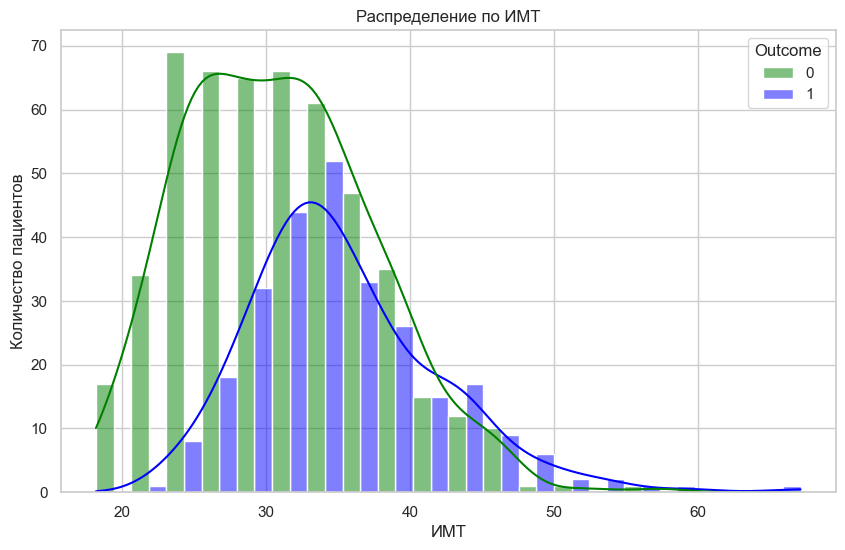

In [13]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, 
                  x='BMI', 
                  hue='Outcome', 
                  multiple='dodge', 
                  bins=20, 
                  kde=True, 
                  palette=['green', 'blue'])

ax.set(title='Распределение по ИМТ',
       xlabel='ИМТ',
       ylabel='Количество пациентов')

plt.show()

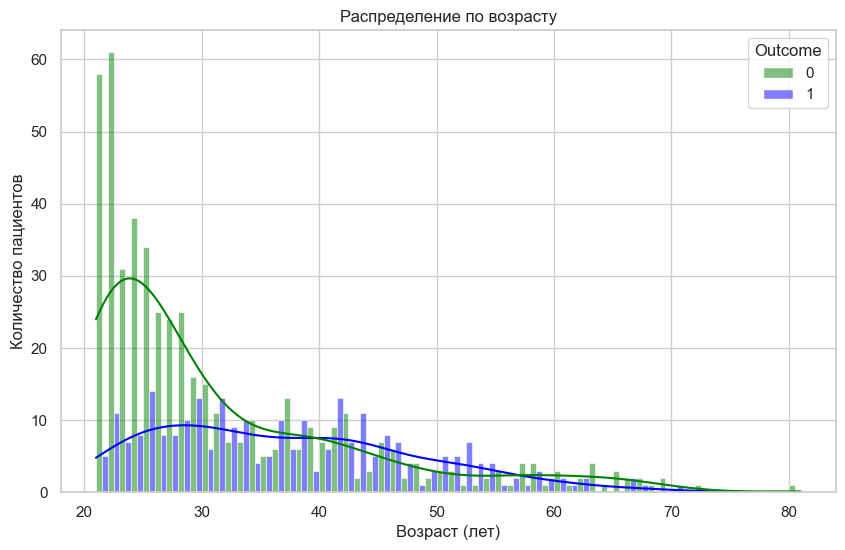

In [14]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, 
                  x='Age', 
                  hue='Outcome', 
                  multiple='dodge', 
                  bins=60, 
                  kde=True, 
                  palette=['green', 'blue'])

ax.set(title='Распределение по возрасту',
       xlabel='Возраст (лет)',
       ylabel='Количество пациентов')

plt.show()

## Корреляция между данными:

In [15]:
cor = df.drop('Outcome', axis=1).corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000


<Axes: >

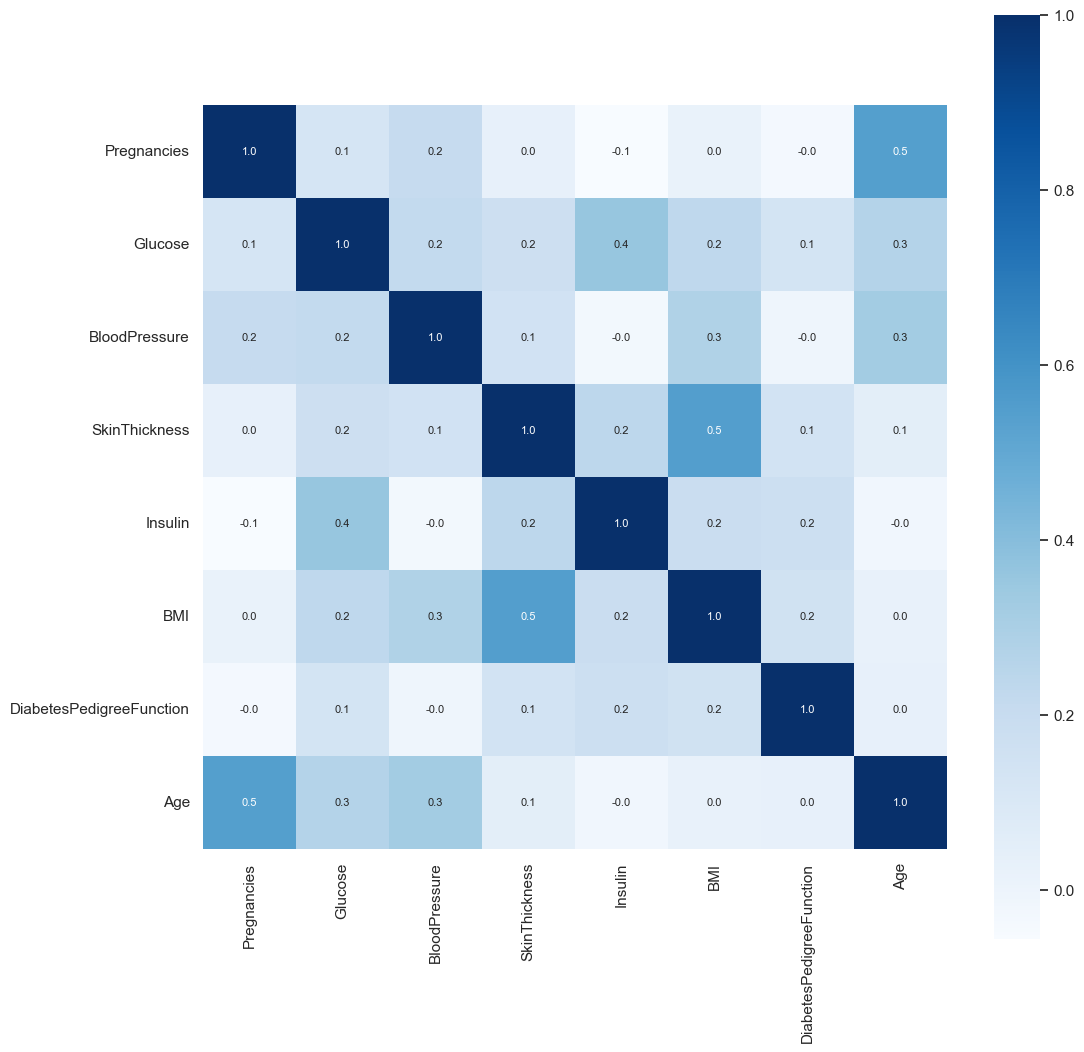

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(cor, 
            cbar=True, 
            square=True, fmt='.1f', 
            annot=True, 
            annot_kws={'size':8}, 
            cmap='Blues')

## 4. Создание модели:

Разделим данные на матрицу признаков и вектор истинных значений:

In [17]:
X = df.drop('Outcome', axis=1) 
y = df['Outcome']

Создадим из наших данных обучающий и тестовый наборы:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Нормализуем наборы данных:

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Создадим модель с методом логистической регрессии с несколькими параметрами и выберем самую точную:

In [20]:
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 300]
}
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, refit=True, scoring='accuracy')
lr_grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры для модели с методом логистической регрессии: ", lr_grid_search.best_params_)
lr_best_model = lr_grid_search.best_estimator_
y_pred_lr_best = lr_best_model.predict(X_test_scaled)
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)
print(f"Точность модели с методом логистической регрессии: {accuracy_lr_best}")

Лучшие параметры для модели с методом логистической регрессии:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Точность модели с методом логистической регрессии: 0.8181818181818182


Создадим модель с методом опорных векторов с несколькими параметрами и выберем самую точную:

In [21]:
svc_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 1.0, 2.0]
}
svc_grid_search = GridSearchCV(SVC(random_state=0), svc_param_grid, cv=5, refit=True, scoring='accuracy')
svc_grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры для модели с методом опороных векторов: ", svc_grid_search.best_params_)
svc_best_model = svc_grid_search.best_estimator_
y_pred_svc_best = svc_best_model.predict(X_test_scaled)
accuracy_svc_best = accuracy_score(y_test, y_pred_svc_best)
print(f"Точность модели с методом опорных векторов:  {accuracy_svc_best}")

Лучшие параметры для модели с методом опороных векторов:  {'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Точность модели с методом опорных векторов:  0.8051948051948052


Создадим модель с методом случайного леса с несколькими параметрами и выберем самую точную:

In [22]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=0), rf_param_grid, cv=5,  refit=True, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры для модели с методом случайного леса: ", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_
y_pred_rf_best = rf_best_model.predict(X_test_scaled)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f"Точность модели с методом случайного леса: {accuracy_rf_best}")

Лучшие параметры для модели с методом случайного леса:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Точность модели с методом случайного леса: 0.8376623376623377


Создадим модель с методом k ближайших соседей с несколькими параметрами и выберем самую точную:

In [23]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, refit=True, scoring='accuracy')
knn_grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры для модели с методом k ближайших соседей: ", knn_grid_search.best_params_)
knn_best_model = knn_grid_search.best_estimator_
y_pred_knn_best = knn_best_model.predict(X_test_scaled)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
print(f"Точность модели с методом k ближайших соседей: {accuracy_knn_best}")

Лучшие параметры для модели с методом k ближайших соседей:  {'n_neighbors': 11, 'weights': 'distance'}
Точность модели с методом k ближайших соседей: 0.8181818181818182


Таким образом, получили, что самая точная модель - модель, обученная по методу случайного леса и имеющая точность - 0.84, сохраним нашу модель для дальнейшего использования:

In [24]:
model = rf_best_model
joblib.dump(model, 'diabetes_prediction_model.joblib')

['diabetes_prediction_model.joblib']

## 5. Вывод:
В данной работе были разработаны несколько разных моделей с различными параметрами для определения диабета у пациентов. Модели были обучена на наборе данных, содержащем показатели пациентов, такие как возраст, давление, индекс массы тела, уровень глюкозы в крови и другие.

Результаты обучения моделей показали, что лучшей оказалась модель, обученная по методу случайного леса, она имеет достаточно высокую точность. На тестовом наборе данных модель показала точность 84%, что означает, что она правильно определила диабет у 84% пациентов.

Для дальнейшего улучшения модели можно рассмотреть следующие варианты:

- Использование более крупных наборов данных. Это позволит модели лучше обобщать результаты на новые данные.
- Использование дополнительных признаков. Например, можно включить в набор данных данные о диете и образе жизни пациента.

Исследование этих вариантов может привести к созданию модели с большей точностью и эффективностью, в дальнейшем и модель может быть использована для диагностики диабета у пациентов на ранних стадиях заболевания. Это может помочь врачам своевременно начать лечение и предотвратить развитие осложнений.